In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

##### Chính sách nếu đầu tư vào ở đồ công nghệ vùng phía Tây, đối tượng khách hàng là consumer

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Order ID,Order Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000
1,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000
2,CA-2017-138688,12/06/2017,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000
3,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,201.864499
4,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000


##### Đọc và lấy dữ liệu

In [4]:
df1 =  df[(df['Segment'] == 'Consumer') & (df['Region'] == 'West') & (df['Category'] == 'Office Supplies')]
df1 = df1[['Customer ID','Order Date','Order ID','Sales']]

In [5]:
df1

,Customer ID,Order Date,Order ID,Sales
6,BH-11710,09/06/2015,CA-2015-115812,7.280
8,BH-11710,09/06/2015,CA-2015-115812,18.504
9,BH-11710,09/06/2015,CA-2015-115812,114.900
13,IM-15070,05/12/2017,CA-2017-161389,407.976
17,AG-10270,13/05/2015,CA-2015-167164,55.500
...,...,...,...,...
9715,LD-17005,07/11/2017,CA-2017-116379,57.584
9729,EB-14170,29/09/2015,CA-2015-111962,10.048
9730,EB-14170,29/09/2015,CA-2015-111962,807.750
9731,JE-15715,14/11/2018,CA-2018-124261,34.240


##### Tính các giá trị Recency, Frequency và Monetary

Recency: Khoảng thời gian mua hàng gần đây nhất là bao lâu. Cho biết khách hàng có đang thực sự hoạt động gần thời điểm đánh giá.
Chỉ số này càng lớn càng cho thấy xu hướng rời bỏ của khách hàng càng cao. Đó là một cảnh báo cho doanh nghiệp nên thay đổi sản 
phẩm để đáp ứng thị hiếu khách hàng hoặc thay đổi chính sách để nâng cao chất lượng phục vụ.

Frequency: Tần suất mua hàng của khách hàng. Nếu khách hàng mua càng nhiều đơn thì giá trị về doanh số mang lại cho công ty càng cao và tất nhiên giá trị của họ càng lớn. Tuy nhiên nếu chỉ xét dựa trên tần suất mua hàng thì cũng chưa đánh giá được đầy đủ mức độ tác động lên doanh thu bởi bên cạnh đó, giá trị đơn hàng cũng là yếu tố trực tiếp cho thấy khách hàng tiềm năng như thế nào.

Monetary: Là số tiền chi tiêu của khách hàng. Đây là yếu tố trực quan nhất ảnh hưởng tới doanh số. Hay nói cách khác, doanh nghiệp quan tâm nhất là khách hàng đã dành bao nhiêu tiền để mua sắm sản phẩm của công ty? Monetary sẽ tác động trực tiếp tới doanh thu và bị tác động gián tiếp thông qua 2 yếu tố còn lại là Recency và Frequency.

In [6]:
from datetime import datetime

In [7]:
# 1. Calculate Recency
# Find the most recent orderDate.

In [8]:
dfRecentOrder = pd.pivot_table(data = df1,
    index = ['Customer ID'],
        values = ['Order Date'],
            aggfunc = {'Order Date':max})
### Tìm đơn hàng được order gần gây nhất ( Oder Date với đơn hàng gần đây nhất )
dfRecentOrder 

,Order Date
Customer ID,
AA-10315,31/03/2015
AA-10375,24/10/2015
AA-10645,05/11/2018
AB-10015,07/03/2015
AB-10105,19/09/2018
...,...
VM-21835,12/05/2017
WB-21850,29/06/2018
XP-21865,12/12/2016


In [9]:
dfRecentOrder.columns = ['RecentOrderDate'] # Thay tên cột 

In [10]:
df1 = pd.merge(df1, dfRecentOrder.reset_index(), on = ['Customer ID']) ## gắn 2 bảng data với nhau ( lấy cột chung là Customer ID )

In [11]:
df1['RecentOrderDate'] = pd.to_datetime(df1['RecentOrderDate']) # chuyển sang dạng giờ 

In [12]:
df1

,Customer ID,Order Date,Order ID,Sales,RecentOrderDate
0,BH-11710,09/06/2015,CA-2015-115812,7.280,2015-09-06
1,BH-11710,09/06/2015,CA-2015-115812,18.504,2015-09-06
2,BH-11710,09/06/2015,CA-2015-115812,114.900,2015-09-06
3,IM-15070,05/12/2017,CA-2017-161389,407.976,2016-11-12
4,IM-15070,11/12/2016,CA-2016-104346,13.120,2016-11-12
...,...,...,...,...,...
969,CS-11950,21/10/2017,CA-2017-161746,12.390,2017-10-21
970,CS-11950,21/10/2017,CA-2017-161746,340.920,2017-10-21
971,LD-17005,07/11/2017,CA-2017-116379,57.584,2017-07-11
972,EB-14170,29/09/2015,CA-2015-111962,10.048,2015-09-29


In [13]:
# Vậy ngày gần đây khách hàng mua sản phẩm là: 
df1['Recency'] = -df1['RecentOrderDate'].apply(lambda x: (datetime.now() - x).days)
df1

,Customer ID,Order Date,Order ID,Sales,RecentOrderDate,Recency
0,BH-11710,09/06/2015,CA-2015-115812,7.280,2015-09-06,-2455
1,BH-11710,09/06/2015,CA-2015-115812,18.504,2015-09-06,-2455
2,BH-11710,09/06/2015,CA-2015-115812,114.900,2015-09-06,-2455
3,IM-15070,05/12/2017,CA-2017-161389,407.976,2016-11-12,-2022
4,IM-15070,11/12/2016,CA-2016-104346,13.120,2016-11-12,-2022
...,...,...,...,...,...,...
969,CS-11950,21/10/2017,CA-2017-161746,12.390,2017-10-21,-1679
970,CS-11950,21/10/2017,CA-2017-161746,340.920,2017-10-21,-1679
971,LD-17005,07/11/2017,CA-2017-116379,57.584,2017-07-11,-1781
972,EB-14170,29/09/2015,CA-2015-111962,10.048,2015-09-29,-2432


In [14]:
# Do số ngày gần nhất kể từ lần mua hàng cuối cùng càng cao thì mức độ active của khách hàng càng thấp.
# Do đó giá trị này càng nhỏ thì khách hàng đó càng có thứ hạng cao. Chính vì vậy ta cần đổi dấu của Recency
# để giá trị của biến đồng biến với rank của khách hàng.

In [15]:
# 2. Calculate Frequency ( tần suất khách hàng mua hàng trong thời gian nghiên cứu )
dfFrequency = df1.groupby('Customer ID')['Order ID'].nunique().to_frame()

In [16]:
dfFrequency.columns = ['Frequency']
df1 = pd.merge(df1, dfFrequency.reset_index(), on = 'Customer ID') 

In [17]:
df1

,Customer ID,Order Date,Order ID,Sales,RecentOrderDate,Recency,Frequency
0,BH-11710,09/06/2015,CA-2015-115812,7.280,2015-09-06,-2455,1
1,BH-11710,09/06/2015,CA-2015-115812,18.504,2015-09-06,-2455,1
2,BH-11710,09/06/2015,CA-2015-115812,114.900,2015-09-06,-2455,1
3,IM-15070,05/12/2017,CA-2017-161389,407.976,2016-11-12,-2022,3
4,IM-15070,11/12/2016,CA-2016-104346,13.120,2016-11-12,-2022,3
...,...,...,...,...,...,...,...
969,CS-11950,21/10/2017,CA-2017-161746,12.390,2017-10-21,-1679,1
970,CS-11950,21/10/2017,CA-2017-161746,340.920,2017-10-21,-1679,1
971,LD-17005,07/11/2017,CA-2017-116379,57.584,2017-07-11,-1781,1
972,EB-14170,29/09/2015,CA-2015-111962,10.048,2015-09-29,-2432,1


In [18]:
# 3. Calculate Monetary ( Tính tổng chi tiêu )
dfMonetary = df.groupby('Customer ID')['Sales'].sum().to_frame()

In [19]:
dfMonetary.columns = ['Monetary']
df1 = pd.merge(df1, dfMonetary.reset_index(), on='Customer ID')

In [20]:
df1.head()

,Customer ID,Order Date,Order ID,Sales,RecentOrderDate,Recency,Frequency,Monetary
0,BH-11710,09/06/2015,CA-2015-115812,7.280,2015-09-06,-2455,1,4751.031499
1,BH-11710,09/06/2015,CA-2015-115812,18.504,2015-09-06,-2455,1,4751.031499
2,BH-11710,09/06/2015,CA-2015-115812,114.900,2015-09-06,-2455,1,4751.031499
3,IM-15070,05/12/2017,CA-2017-161389,407.976,2016-11-12,-2022,3,4930.474000
4,IM-15070,11/12/2016,CA-2016-104346,13.120,2016-11-12,-2022,3,4930.474000


##### Chia các khoảng rank của 3 RFM theo mức 10

In [21]:
orderFrequencies = df1['Frequency'].rank(method='first')
df1['rFrequency'] = pd.qcut(orderFrequencies, 10, labels = False)
df1[['rRecency', 'rMonetary']] = df1[['Recency', 'Monetary']].apply(lambda x: pd.qcut(x, 10, labels = False)) 
df1['rank'] = (df1['rFrequency'] + df1['rRecency'] + df1['rMonetary'])/3
df1['FinalRank'] = df1['rank'].apply(int) 

In [22]:
df1.head()

,Customer ID,Order Date,Order ID,Sales,RecentOrderDate,Recency,Frequency,Monetary,rFrequency,rRecency,rMonetary,rank,FinalRank
0,BH-11710,09/06/2015,CA-2015-115812,7.280,2015-09-06,-2455,1,4751.031499,0,0,8,2.666667,2
1,BH-11710,09/06/2015,CA-2015-115812,18.504,2015-09-06,-2455,1,4751.031499,0,0,8,2.666667,2
2,BH-11710,09/06/2015,CA-2015-115812,114.900,2015-09-06,-2455,1,4751.031499,0,0,8,2.666667,2
3,IM-15070,05/12/2017,CA-2017-161389,407.976,2016-11-12,-2022,3,4930.474000,5,3,8,5.333333,5
4,IM-15070,11/12/2016,CA-2016-104346,13.120,2016-11-12,-2022,3,4930.474000,5,3,8,5.333333,5


##### Xem phân phối điểm rank

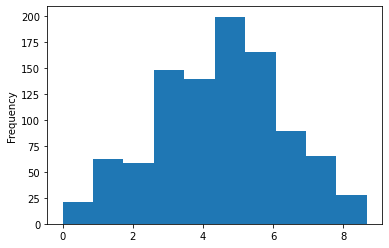

In [23]:
df1['rank'].plot.hist(bins = 10)
plt.show()

In [24]:
# Nhận xét: Có thể thấy rằng khách hàng phân bố tập trung chủ yếu ở mức rank từ 3 đến 6, 
# Mức rank càng cao hoặc càng thấp thì số lượng khách hàng càng ít.

In [25]:
# Dựa vào biểu đồ, phân tập khách hàng thành 3 nhóm như sau:
# Khách hàng ít tiềm năng - nhãn Low: Rank từ [0, 3)
# Khách hàng thông thường - Normal: Rank từ [3, 6)
# Khách hàng VIP - nhãn VIP: Rank [6, 9]

In [26]:
df1['Segment'] = 'Low'
df1.loc[(df1['rank'] < 6) & (df1['rank'] >= 3), 'Segment'] = 'Normal'
df1.loc[df1['rank'] >= 6, 'Segment'] = 'VIP'

In [27]:
# Thống kê số lượng khách hàng theo mỗi Segment vừa tạo nên:

In [28]:
df1.head()

,Customer ID,Order Date,Order ID,Sales,RecentOrderDate,Recency,Frequency,Monetary,rFrequency,rRecency,rMonetary,rank,FinalRank,Segment
0,BH-11710,09/06/2015,CA-2015-115812,7.280,2015-09-06,-2455,1,4751.031499,0,0,8,2.666667,2,Low
1,BH-11710,09/06/2015,CA-2015-115812,18.504,2015-09-06,-2455,1,4751.031499,0,0,8,2.666667,2,Low
2,BH-11710,09/06/2015,CA-2015-115812,114.900,2015-09-06,-2455,1,4751.031499,0,0,8,2.666667,2,Low
3,IM-15070,05/12/2017,CA-2017-161389,407.976,2016-11-12,-2022,3,4930.474000,5,3,8,5.333333,5,Normal
4,IM-15070,11/12/2016,CA-2016-104346,13.120,2016-11-12,-2022,3,4930.474000,5,3,8,5.333333,5,Normal


<AxesSubplot:ylabel='Customer ID'>

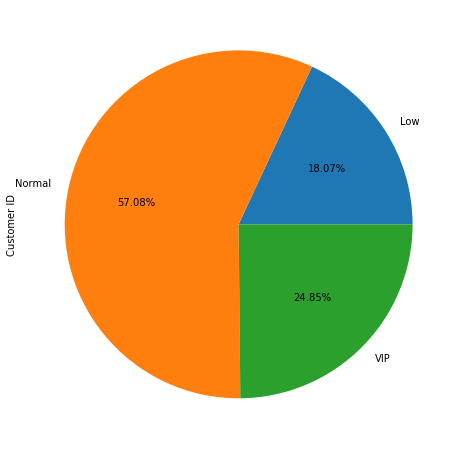

In [29]:
df1.groupby('Segment').agg({'Customer ID' : 'count'})['Customer ID'].plot.pie(autopct = '%.2f%%', figsize = (8, 8))
# plt.title('Tỷ lệ số lượng khách hàng theo segment KH')

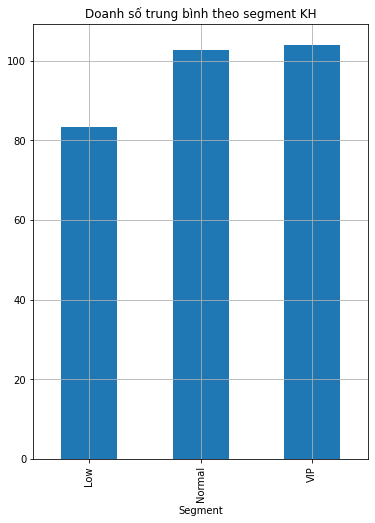

In [30]:
df1.groupby('Segment').agg({'Sales' : 'mean'})['Sales'].plot.bar(figsize = (6, 8))
plt.title('Doanh số trung bình theo segment KH')
plt.grid()


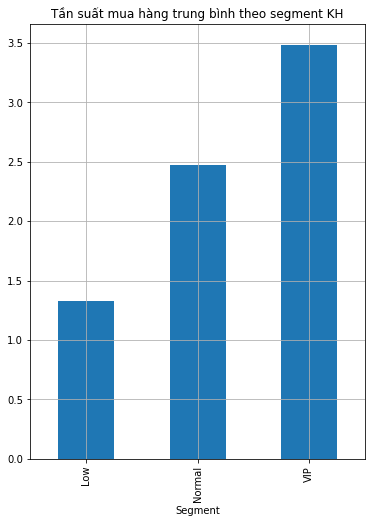

In [31]:
df1.groupby('Segment').agg({'Frequency' : 'mean'})['Frequency'].plot.bar(figsize = (6, 8))
plt.title('Tần suất mua hàng trung bình theo segment KH')
plt.grid()

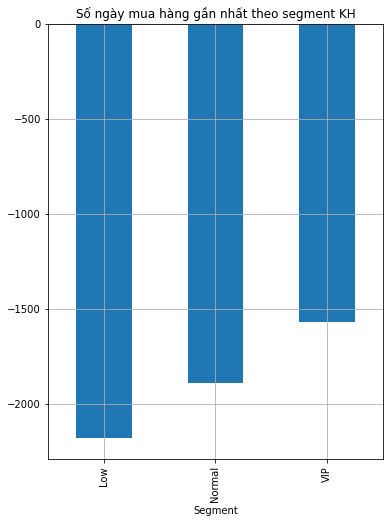

In [32]:
df1.groupby('Segment').agg({'Recency' : 'mean'})['Recency'].plot.bar(figsize = (6, 8))
plt.title('Số ngày mua hàng gần nhất theo segment KH')
plt.grid()